In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [ ]:
# Load the dataset
file_path = 'POP_49824rows_DEC2015_sp_yt_usdemogr.csv'
data = pd.read_csv(file_path)

# extract date features
def extract_date_features(df):
    df['Event Date'] = pd.to_datetime(df['Event Date'])
    df['Year'] = df['Event Date'].dt.year
    df['Month'] = df['Event Date'].dt.month
    df['Day of Week'] = df['Event Date'].dt.dayofweek
    return df

data = extract_date_features(data)

# target var and features
target = 'Avg. Gross USD'
features = ['Number of Shows', 'Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD', 
            'Avg. Capacity Sold', 'Market', 'Genre', 'City', 'State', 'Venue', 'Headliner', 'Support', 
            'Promoter', 'sp followers', 'yt Subscriber Count', 'Year', 'Month', 'Day of Week']

cols_to_convert = [
    'Avg. Gross USD', 'Avg. Tickets Sold', 'Avg. Event Capacity', 'Avg. Capacity Sold', 
    'Ticket Price Min USD', 'Ticket Price Max USD', 'Ticket Price Avg. USD'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace('[^0-9.]', '', regex=True), errors='coerce')



/tmp/ipykernel_302239/1705207403.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Text(0, 0.5, 'Frequency')

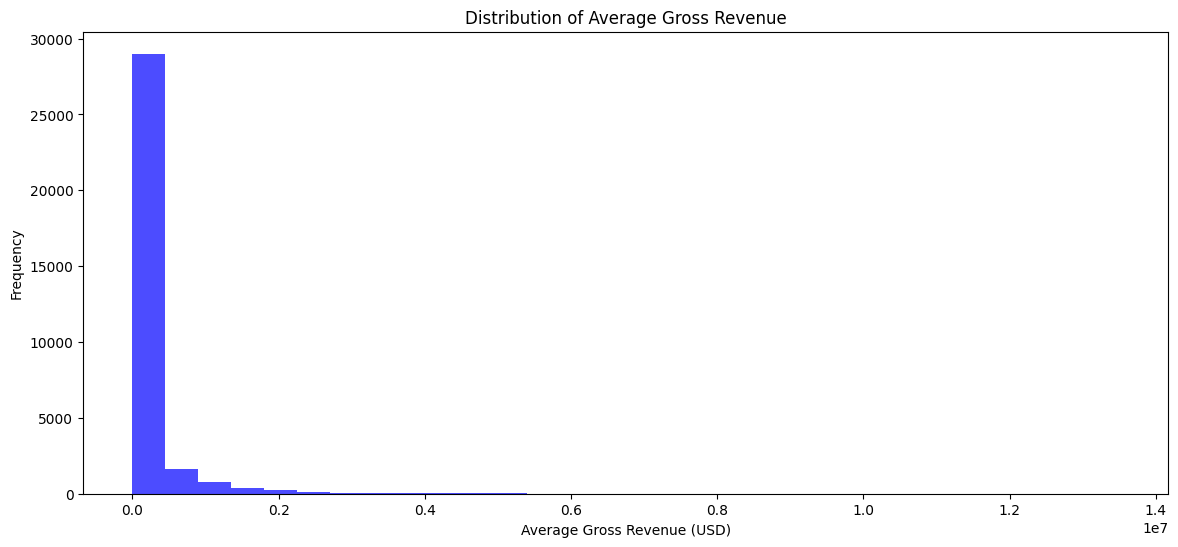

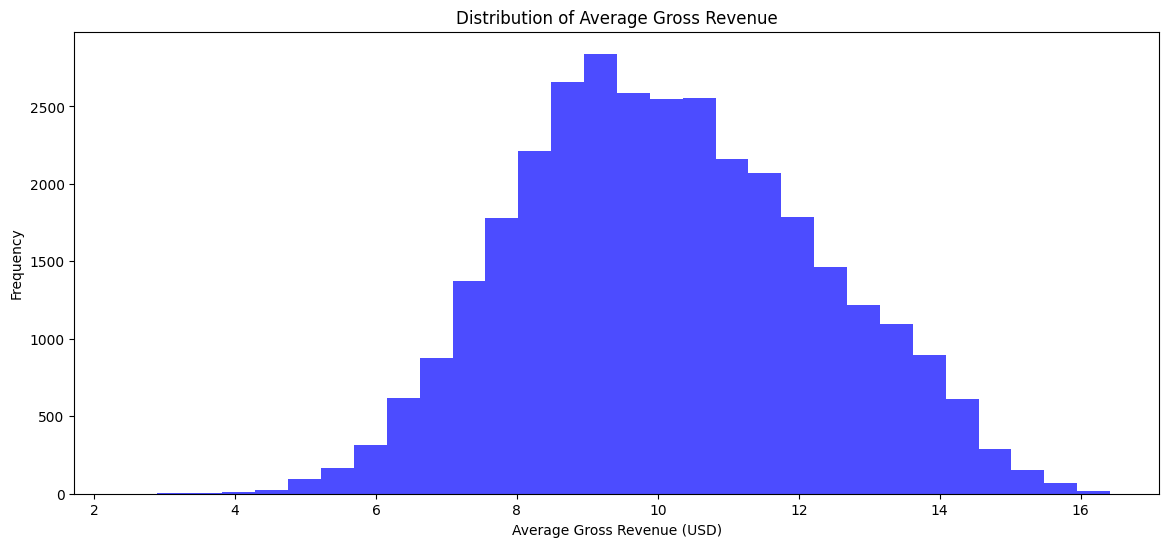

In [40]:
# Histograms for average gross revenue and log
plt.figure(figsize=(14, 6))

plt.hist(data['Avg. Gross USD'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Gross Revenue')
plt.xlabel('Average Gross Revenue (USD)')
plt.ylabel('Frequency')

plt.figure(figsize=(14, 6))

plt.hist(np.log(data['Avg. Gross USD'].dropna()), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Gross Revenue')
plt.xlabel('Average Gross Revenue (USD)')
plt.ylabel('Frequency')


In [ ]:
# preprocessors
numerical_features = ['Number of Shows', 'Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD', 
                      'Avg. Capacity Sold', 'sp followers', 'yt Subscriber Count', 'Year', 'Month', 'Day of Week']
categorical_features = ['Market', 'Genre', 'City', 'State', 'Venue', 'Headliner', 'Support', 'Promoter']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [30]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.900454554330852
Root Mean Squared Error: 202930.84475704204


In [28]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9291090584301027
Root Mean Squared Error: 896641.6238948266


In [32]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9291090584301027
Root Mean Squared Error: 0.566812263196511


In [ ]:
np.std(data[target])

614480.4501125409

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200)) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9927374129571531
Root Mean Squared Error: 122376.36606895115


In [34]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200)) 
])
from sklearn.model_selection import train_test_split
import math

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9604539553933901
Root Mean Squared Error: 127905.40333743888


In [37]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha = 0.001)) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.8261817001330038
Root Mean Squared Error: 1079344097.7187643


In [38]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',XGBRegressor(
    n_estimators=123,
    max_depth = 6,
    min_child_weight=6.775491524356438,
    learning_rate=0.2045492385700394,
    subsample=0.9538853360715174,
    colsample_bylevel=0.9843540929830947,
    colsample_bytree=0.7927149465668909,
    reg_alpha=0.05758042236618048,
    reg_lambda=5.778258009012479,
    objective='reg:squarederror',
    enable_categorical=True
)
) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9922322478596517
Root Mean Squared Error: 145955.8915351116


In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

model_params = [
    {'model': [LinearRegression()]},
    {'model': [Lasso()], 'model__alpha': [0.001, 0.01, 0.1, 1]},
    {'model': [RandomForestRegressor()], 'model__n_estimators': [50, 100, 200]},
    {'model': [XGBRegressor(objective='reg:squarederror')], 'model__max_depth': [3, 5], 'model__n_estimators': [50, 100]}
]

grid_search = GridSearchCV(pipeline, model_params, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(data[features], data[target])